# Tutorial

In [1]:
from xtimeutil import Remapper
from xtimeutil.testing import create_dataset
import xarray as xr

## Input Data

For demonstration purposes, we are going to use the `create_dataset()` function for generating test data. 

In [2]:
ds = create_dataset(start="2000-01-01", end="2002-01-01", freq="D", nlats=12, nlons=15, decode_times=True)
ds['tmin'] = ds['tmin'].where((ds.lat < 88) & (ds.lat >  -88)) # Introduce some missing values
ds

<xarray.Dataset>
Dimensions:      (d2: 2, lat: 12, lon: 15, time: 731)
Coordinates:
  * time         (time) object 2000-01-01 12:00:00 ... 2001-12-31 12:00:00
  * lat          (lat) float32 -90.0 -73.63636 -57.272728 ... 73.63636 90.0
  * lon          (lon) float32 -180.0 -154.28572 -128.57143 ... 154.28572 180.0
Dimensions without coordinates: d2
Data variables:
    tmin         (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmax         (time, lat, lon) float32 -0.3262634 3.3189852 ... 4.2668486
    time_bounds  (time, d2) object 2000-01-01 00:00:00 ... 2002-01-01 00:00:00

Our input data set consists of two variables `tmin`, and `tmax` plus the `time_bounds` variable. The data was generated at a daily frequency for two years. 

## Remapper Object


Say we want to downsample the input data from `daily` to `weekly` frequency. To achieve this, we create a remapper object, and pass in:

- An xarray Dataset containing the time, time boundary information of the incoming time axis.
- An outgoing frequency. For e.g 'M', '2D', 'H', or '3T' For full specification of available frequencies, please see [here](https://xarray.pydata.org/en/stable/generated/xarray.cftime_range.html)

In [3]:
remapper = Remapper(ds, freq="7D")
remapper

During the `Remapper` object creation, `xtimeutil` uses the incoming time axis information in conjunction with the specified frequency to construct an outgoing time axis information.

In [4]:
remapper.weights  # Generated weights: used for remapping

<xarray.DataArray (outgoing: 105, incoming: 731)>
array([[0.14285714, 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14285714, 0.14285714,
        0.14285714]])
Coordinates:
  * outgoing  (outgoing) object 2000-01-04 12:00:00 ... 2002-01-01 12:00:00
  * incoming  (incoming) object 2000-01-01 12:00:00 ... 2001-12-31 12:00:00

The remapper is telling us that it can remap data from a daily time frequency `with 731 incoming timesteps (731 days)` to monthly time frequency with `105 outgoing timesteps (105 weeks)`.


In [5]:
remapper.incoming["decoded_time_bounds"]

<xarray.DataArray 'time_bounds' (time: 731, d2: 2)>
array([[cftime.DatetimeGregorian(2000-01-01 00:00:00),
        cftime.DatetimeGregorian(2000-01-02 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-02 00:00:00),
        cftime.DatetimeGregorian(2000-01-03 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-03 00:00:00),
        cftime.DatetimeGregorian(2000-01-04 00:00:00)],
       ...,
       [cftime.DatetimeGregorian(2001-12-29 00:00:00),
        cftime.DatetimeGregorian(2001-12-30 00:00:00)],
       [cftime.DatetimeGregorian(2001-12-30 00:00:00),
        cftime.DatetimeGregorian(2001-12-31 00:00:00)],
       [cftime.DatetimeGregorian(2001-12-31 00:00:00),
        cftime.DatetimeGregorian(2002-01-01 00:00:00)]], dtype=object)
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2001-12-31 12:00:00
Dimensions without coordinates: d2

In [6]:
remapper.outgoing["decoded_time_bounds"]

<xarray.DataArray (time: 105, d2: 2)>
array([[cftime.DatetimeGregorian(2000-01-01 00:00:00),
        cftime.DatetimeGregorian(2000-01-08 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-08 00:00:00),
        cftime.DatetimeGregorian(2000-01-15 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-15 00:00:00),
        cftime.DatetimeGregorian(2000-01-22 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-22 00:00:00),
        cftime.DatetimeGregorian(2000-01-29 00:00:00)],
       [cftime.DatetimeGregorian(2000-01-29 00:00:00),
        cftime.DatetimeGregorian(2000-02-05 00:00:00)],
       [cftime.DatetimeGregorian(2000-02-05 00:00:00),
        cftime.DatetimeGregorian(2000-02-12 00:00:00)],
       [cftime.DatetimeGregorian(2000-02-12 00:00:00),
        cftime.DatetimeGregorian(2000-02-19 00:00:00)],
       [cftime.DatetimeGregorian(2000-02-19 00:00:00),
        cftime.DatetimeGregorian(2000-02-26 00:00:00)],
       [cftime.DatetimeGregorian(2000-02-26 00:00:00),
        cftime.DatetimeGregorian(2000-03-04 00:00:00)],
       [cftime.DatetimeGregorian(2000-03-04 00:00:00),
        cftime.DatetimeGregorian(2000-03-11 00:00:00)],
       [cftime.DatetimeGregorian(2000-03-11 00:00:00),
        cftime.DatetimeGregorian(2000-03-18 00:00:00)],
       [cftime.DatetimeGregorian(2000-03-18 00:00:00),
        cftime.DatetimeGregorian(2000-03-25 00:00:00)],
       [cftime.DatetimeGregorian(2000-03-25 00:00:00),
        cftime.DatetimeGregorian(2000-04-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-01 00:00:00),
        cftime.DatetimeGregorian(2000-04-08 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-08 00:00:00),
        cftime.DatetimeGregorian(2000-04-15 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-15 00:00:00),
        cftime.DatetimeGregorian(2000-04-22 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-22 00:00:00),
        cftime.DatetimeGregorian(2000-04-29 00:00:00)],
       [cftime.DatetimeGregorian(2000-04-29 00:00:00),
        cftime.DatetimeGregorian(2000-05-06 00:00:00)],
       [cftime.DatetimeGregorian(2000-05-06 00:00:00),
        cftime.DatetimeGregorian(2000-05-13 00:00:00)],
       [cftime.DatetimeGregorian(2000-05-13 00:00:00),
        cftime.DatetimeGregorian(2000-05-20 00:00:00)],
       [cftime.DatetimeGregorian(2000-05-20 00:00:00),
        cftime.DatetimeGregorian(2000-05-27 00:00:00)],
       [cftime.DatetimeGregorian(2000-05-27 00:00:00),
        cftime.DatetimeGregorian(2000-06-03 00:00:00)],
       [cftime.DatetimeGregorian(2000-06-03 00:00:00),
        cftime.DatetimeGregorian(2000-06-10 00:00:00)],
       [cftime.DatetimeGregorian(2000-06-10 00:00:00),
        cftime.DatetimeGregorian(2000-06-17 00:00:00)],
       [cftime.DatetimeGregorian(2000-06-17 00:00:00),
        cftime.DatetimeGregorian(2000-06-24 00:00:00)],
       [cftime.DatetimeGregorian(2000-06-24 00:00:00),
        cftime.DatetimeGregorian(2000-07-01 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-01 00:00:00),
        cftime.DatetimeGregorian(2000-07-08 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-08 00:00:00),
        cftime.DatetimeGregorian(2000-07-15 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-15 00:00:00),
        cftime.DatetimeGregorian(2000-07-22 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-22 00:00:00),
        cftime.DatetimeGregorian(2000-07-29 00:00:00)],
       [cftime.DatetimeGregorian(2000-07-29 00:00:00),
        cftime.DatetimeGregorian(2000-08-05 00:00:00)],
       [cftime.DatetimeGregorian(2000-08-05 00:00:00),
        cftime.DatetimeGregorian(2000-08-12 00:00:00)],
       [cftime.DatetimeGregorian(2000-08-12 00:00:00),
        cftime.DatetimeGregorian(2000-08-19 00:00:00)],
       [cftime.DatetimeGregorian(2000-08-19 00:00:00),
        cftime.DatetimeGregorian(2000-08-26 00:00:00)],
       [cftime.DatetimeGregorian(2000-08-26 00:00:00),
        cftime.DatetimeGregorian(2000-09-02 00:00:00)],
       [cftime.DatetimeGregorian(2000-09-02 00:00:00),
        cftime.Datetim

## Performing remapping

Now that we have an instance of the `Remapper` object, we can tell `xtimeutil` to convert data from the incoming time axis to the outgoing (destination) axis. 

In [7]:
tmin_out = remapper.mean(ds.tmin)
tmin_out

<xarray.DataArray (time: 105, lat: 12, lon: 15)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-4.26411419, -5.0626486 , -7.26503539, ..., -6.59005843,
         -6.16048074, -5.92163058],
        [-5.36200746, -4.54048546, -5.12858423, ..., -2.48118818,
         -5.17029754, -2.46221103],
        ...,
        [-6.41717344, -6.13566712, -5.64627722, ..., -4.09133037,
         -6.04098285, -3.04015718],
        [-4.89098539, -5.28268476, -6.08717884, ..., -4.02369287,
         -5.60502883, -4.54468438],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-6.47832331, -5.09290135, -4.57181321, ..., -4.55388771,
         -5.18504895, -3.4144685 ],
        [-3.54284884, -5.54873262, -4.68722466, ..., -4.75867298,
         -3.99263226, -3.21532798],
        ...,
        [-5.51397852, -4.91191542, -5.77922678, ..., -5.50708064,
         -4.43157125, -3.35703501],
        [-4.1410474 , -3.51095696, -5.94612394, ..., -4.82083186,
         -6.55306738, -4.88191533],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-5.75463099, -4.39824554, -4.49959962, ..., -6.7166966 ,
         -4.02460885, -4.42840196],
        [-6.14953416, -6.6524383 , -5.85239816, ..., -4.4803237 ,
         -3.84590676, -4.80404173],
        ...,
        [-7.3716539 , -4.67720532, -6.59354241, ..., -5.93639826,
         -5.64418457, -3.69435475],
        [-3.82996498, -5.63355577, -5.59165144, ..., -4.376774  ,
         -5.49151312, -4.77510523],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-2.71086548, -2.51411185, -3.98045519, ..., -3.13503514,
         -1.69093714, -3.49686904],
        [-4.03718638, -2.62553113, -4.24874038, ..., -1.2548283 ,
         -4.29211013, -4.98407512],
        ...,
        [-3.93610675, -5.38684369, -3.80944968, ..., -5.18802762,
         -5.47628011, -4.38338838],
        [-3.57031613, -3.53348749, -4.17513122, ..., -1.64662709,
         -3.77315932, -4.11806976],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-2.36038874, -3.24859112, -4.74176275, ..., -3.08747969,
         -2.30887241, -3.98484283],
        [-4.58060983, -2.81524985, -4.11958092, ..., -4.22125474,
         -2.32265827, -3.82688922],
        ...,
        [-2.68748495, -4.34095177, -5.75382934, ..., -3.8694055 ,
         -2.51843636, -3.40844213],
        [-6.03036686, -3.86806893, -2.28204419, ..., -3.5541185 ,
         -3.84192681, -4.41143106],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-1.44371632, -2.1052054 , -2.10345864, ..., -0.57512408,
         -1.49319434, -2.44964344],
        [-3.11306722, -1.18557526, -2.30938925, ..., -1.09635865,
         -2.42757322, -2.41924286],
        ...,
        [-2.08692711, -0.51982587, -1.88900248, ..., -1.95613037,
         -1.85501214, -2.80822965],
        [-3.23526921, -1.73795861, -2.19240972, ..., -2.35572927,
         -2.14951169, -1.15593309],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) object 2000-01-04 12:00:00 ... 2002-01-01 12:00:00
  * lat      (lat) float32 -90.0 -73.63636 -57.272728 ... 73.63636 90.0
  * lon      (lon) f

## Check results

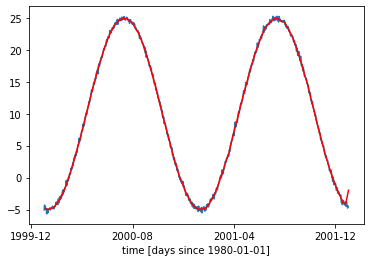

In [8]:
ds.tmin.mean(dim=["lat", "lon"]).plot()
tmin_out.mean(dim=["lat", "lon"]).plot(color="red");

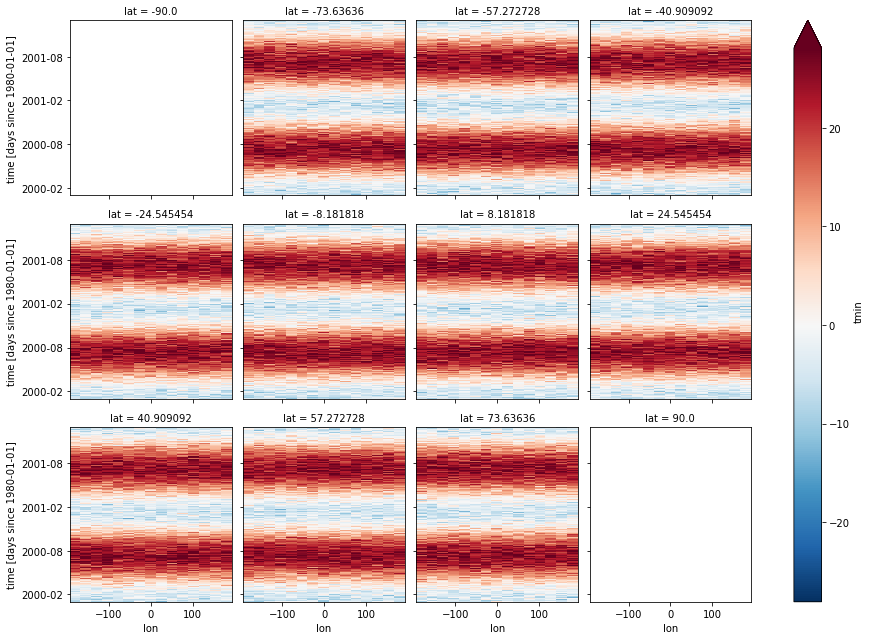

In [9]:
ds.tmin.plot(col='lat', col_wrap=4, robust=True);

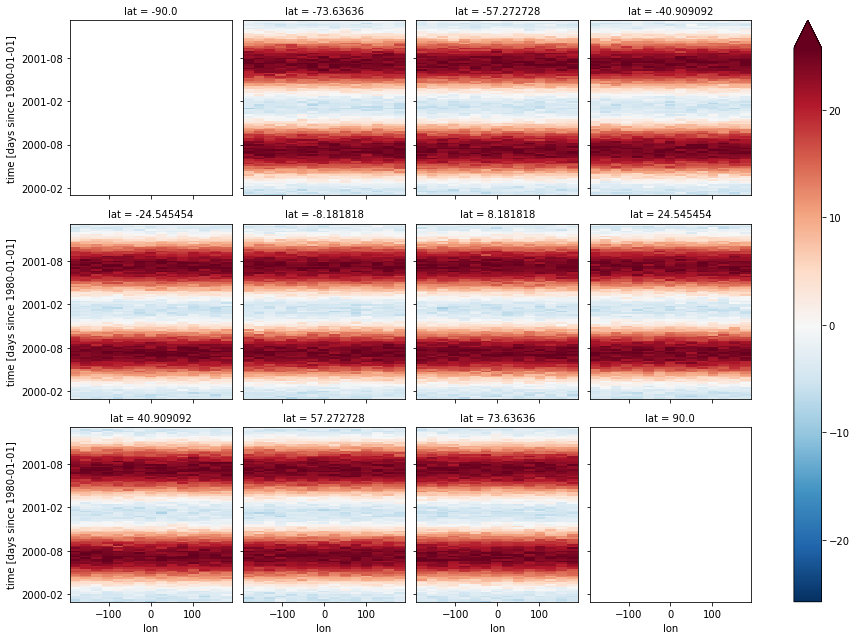

In [10]:
tmin_out.plot(col='lat', col_wrap=4, robust=True);

## Check broadcasting over extra dimensions

The remapping should affect the time dimension **only**. We can check that `xtimeutil` tracks coordinate values over extra dimensions

In [11]:
# Passes if the output is exactly the same as the input
xr.testing.assert_identical(ds.lat, tmin_out.lat)
xr.testing.assert_identical(ds.lon, tmin_out.lon)

We can plot the time series at a specific location, to make sure the broadcasting is correct:

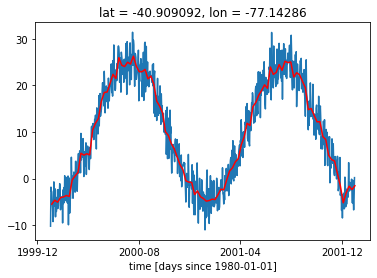

In [12]:
ds.tmin.isel(lat=3, lon=4).plot()
tmin_out.isel(lat=3, lon=4).plot(color="red");

In [13]:
%load_ext watermark
%watermark -v -m -g -p xarray,xtimeutil,cftime,pandas

CPython 3.7.6
IPython 7.13.0

xarray 0.15.1
xtimeutil 0.0.post35+dirty
cftime 1.1.1.2
pandas 1.0.3

compiler   : Clang 9.0.1 
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : b17e290d198dcabb7fbc86ef2666144bea0bbf46
